In [144]:
#Whale of a Portfolio 

import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline
import seaborn as sns

In [145]:
#read in CSV files for 3 whales and clean data
#check data first, drop na's, sort so its read in the correct way


In [146]:
csv_path_whale =  Path("/Users/brent/RU-HOU-FIN-PT-07-2019-U-C/hw/03-Python_and_Pandas/Instructions/Resources/whale_returns.csv")

csv_path_whale

WindowsPath('/Users/brent/RU-HOU-FIN-PT-07-2019-U-C/hw/03-Python_and_Pandas/Instructions/Resources/whale_returns.csv')

In [147]:
whale_df = pd.read_csv(csv_path_whale,index_col = "Date",infer_datetime_format = True, parse_dates = True)

In [148]:
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [149]:
whale_df.isnull().sum()
    


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [150]:
whale_df.dropna(inplace=True)
whale_df.isnull().sum()
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [151]:
#AlGO RETURNS 
csv_path_algo = Path("/Users/brent/RU-HOU-FIN-PT-07-2019-U-C/hw/03-Python_and_Pandas/Instructions/Resources/algo_returns.csv")


In [152]:
algo_df = pd.read_csv(csv_path_algo, index_col = "Date", parse_dates = True, infer_datetime_format = True)






In [153]:
algo_df.isnull().sum()
algo_df.dropna(inplace=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [154]:
#SPY5oo RETURNS 

csv_path_spy = Path("/Users/brent/RU-HOU-FIN-PT-07-2019-U-C/hw/03-Python_and_Pandas/Instructions/Resources/sp500_history.csv")


In [155]:

spy_df = pd.read_csv(csv_path_spy, index_col = "Date", parse_dates = True, infer_datetime_format = True)

spy_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [156]:

spy_df["Close"] = spy_df["Close"].str.replace("$","").astype(float)
spy_df.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [157]:
spy_df = spy_df.loc[::-1]

spy_df.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [158]:
#SPY RETURNS 

spy_df = spy_df.pct_change()
spy_df.dropna(inplace=True)
spy_df.rename(columns={"Close": "S&P 500"},inplace = True)

spy_df.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [159]:
#COncat all Dataframes

all_returns = pd.concat([whale_df,spy_df, algo_df], axis = 1, join = "inner")
all_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,Algo 1,Algo 2
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.004539,-0.001942,-0.000949
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.004389,-0.008589,0.002416
2015-03-05,0.004016,0.004076,0.002355,0.006726,0.001196,-0.000955,0.004323
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.014174,-0.004957,-0.011460
2015-03-09,0.000582,0.004225,0.005843,-0.001652,0.003944,-0.005447,0.001303


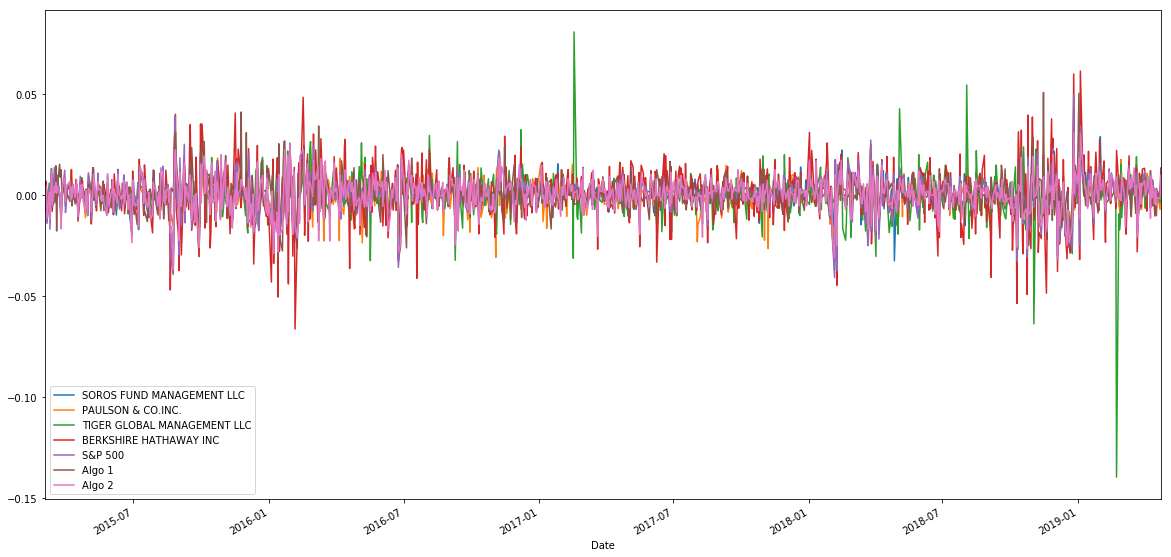

In [160]:
###Portfolio Analysis
##Performance Daily Plot


all_returns.plot(figsize = (20,10))

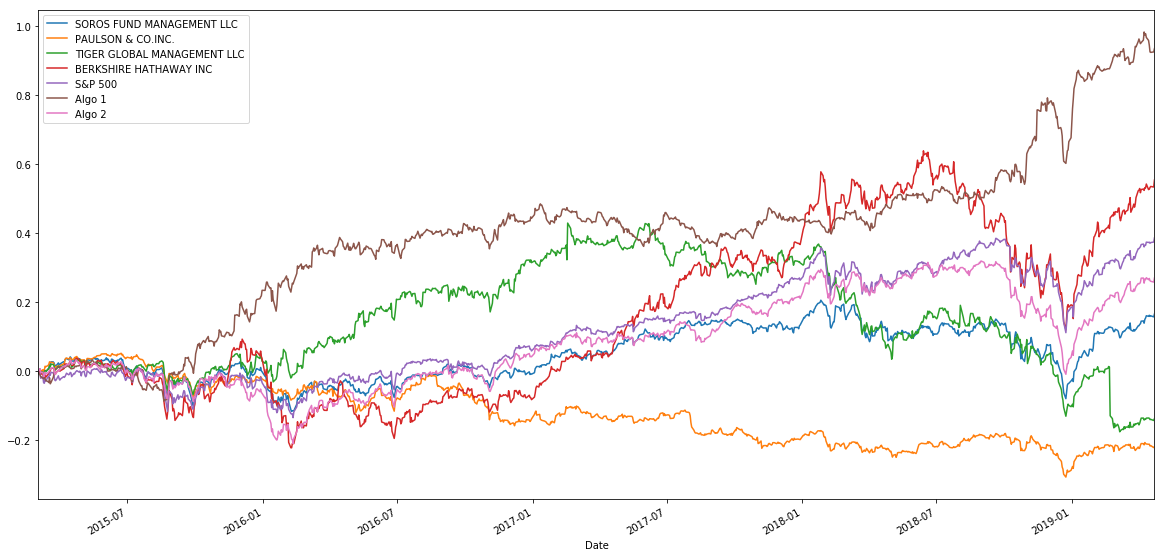

In [161]:
##Cumulative here

cumulative_returns_by_year = (1 +all_returns).cumprod()-1
cumulative_returns_by_year.plot(figsize = (20,10))
#annual_returns.head()

In [162]:
##Performance by Month and Year
# Order Annual
two = (1 + all_returns).groupby(cumulative_returns_by_year.index.year).prod()-1

two

# cumulative_returns_by_year = all_returns.groupby(all_returns.index.year).apply(lambda x: (1+x).cumprod() - 1)
# annual_returns = cumulative_returns_by_year.groupby(cumulative_returns_by_year.index.year).last()

# annual_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,Algo 1,Algo 2
Date,,,,,,,
2015,-0.003019,-0.023685,0.027644,0.034440,-0.034689,0.233385,-0.065759
2016,-0.006991,-0.119136,0.278194,-0.114539,0.095350,0.169350,0.113744
2017,0.144073,-0.069746,-0.000498,0.491562,0.194200,-0.003228,0.162514
2018,-0.143357,-0.111315,-0.317783,-0.128091,-0.062373,0.165843,-0.141432
2019,0.200247,0.096603,-0.038493,0.304057,0.170265,0.154337,0.222163


In [163]:
##Performance by Month and Year
# 2017 in Descending Order Annual
two.loc[2017].sort_values(ascending=False)




BERKSHIRE HATHAWAY INC         0.491562
S&P 500                        0.194200
Algo 2                         0.162514
SOROS FUND MANAGEMENT LLC      0.144073
TIGER GLOBAL MANAGEMENT LLC   -0.000498
Algo 1                        -0.003228
PAULSON & CO.INC.             -0.069746
Name: 2017, dtype: float64

In [164]:
##Performance by Month and Year
#Monthly Returns 
# g = all_returns.groupby(pd.Grouper(freq = "Y"))
# g.resample("M").sum()


In [165]:
# Returns by Month

# End of Month Returns
last_of_month_ret = cumulative_returns_by_year.groupby(
    [cumulative_returns_by_year.index.year, cumulative_returns_by_year.index.month]
).last()

# Calculate the monthly returns
monthly_returns = last_of_month_ret / last_of_month_ret.shift() - 1

monthly_returns.index.names = ["Year", "Month"]
monthly_returns.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Year Month                                                  
2015 3                            NaN                 NaN   
     4                       0.191983            1.509627   
     5                       0.402747            0.717558   
     6                      -0.727746           -0.245906   
     7                      -1.901597           -0.516091   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC   S&P 500  \
Year Month                                                                  
2015 3                              NaN                     NaN       NaN   
     4                         1.111616                5.173994 -0.355960   
     5                        -0.072283                0.071235 -0.686324   
     6                        -1.277106               -1.341775  4.428000   
     7                        -3.924917                4.127232 -0.750368   

              Algo 1     Algo 2  
Year Month                       
2015 3           NaN        NaN  
     4     -0.567652  -9.994711  
     5      1.716783   0.107301  
     6     -0.218273  -1.054097  
     7     -4.442733  31.990099

In [166]:
##Performance by Month and Year
#December 2018 in Descending order
monthly_returns.index.names = ["Year", "Month"]
monthly_returns.loc[2018]


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,Algo 1,Algo 2
Month,,,,,,,
1,0.449698,-0.034873,0.099845,0.515230,0.270037,-0.051476,0.293885
2,-0.173712,0.166583,-0.416229,-0.124025,-0.155686,0.092902,-0.133087
3,-0.315128,0.001992,-0.305709,0.016635,-0.122326,-0.046298,0.018663
4,-0.155097,0.040432,-0.566647,0.015454,0.013716,0.088077,-0.008000
5,0.019252,0.021975,0.592143,0.082676,0.107828,0.091640,0.160251
6,0.134250,-0.077525,0.638957,0.024431,0.022283,0.021983,-0.006857
7,0.110786,-0.031722,-0.124132,-0.067631,0.162934,-0.055405,0.070816
8,0.161416,-0.133745,0.012710,-0.037962,0.121949,0.014344,0.086364
9,0.004497,0.011034,-0.315135,-0.092978,0.015890,0.157409,-0.061526


In [167]:
#####RISK#####

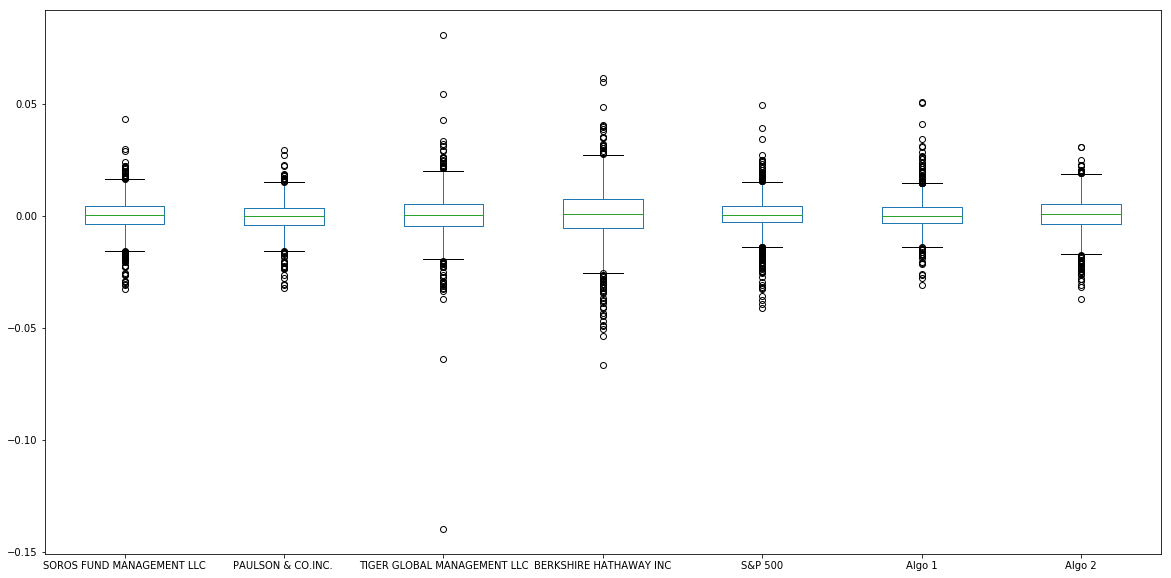

In [168]:
###Box Plots 

all_returns.plot.box(figsize = (20,10))

In [169]:
# Box plot to visually show risk
# FOR EACH PORTFOLIO

In [211]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE

risk = all_returns.std()

risk

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
S&P 500                        0.008554
Algo 1                         0.007620
Algo 2                         0.008342
dtype: float64

In [212]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE


risk > risk[4]

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
S&P 500                        False
Algo 1                         False
Algo 2                         False
dtype: bool

In [213]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE



ann_std = risk * np.sqrt(252)
ann_std



SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
S&P 500                        0.135786
Algo 1                         0.120967
Algo 2                         0.132430
dtype: float64

In [173]:
####ROLLING STATISTICS

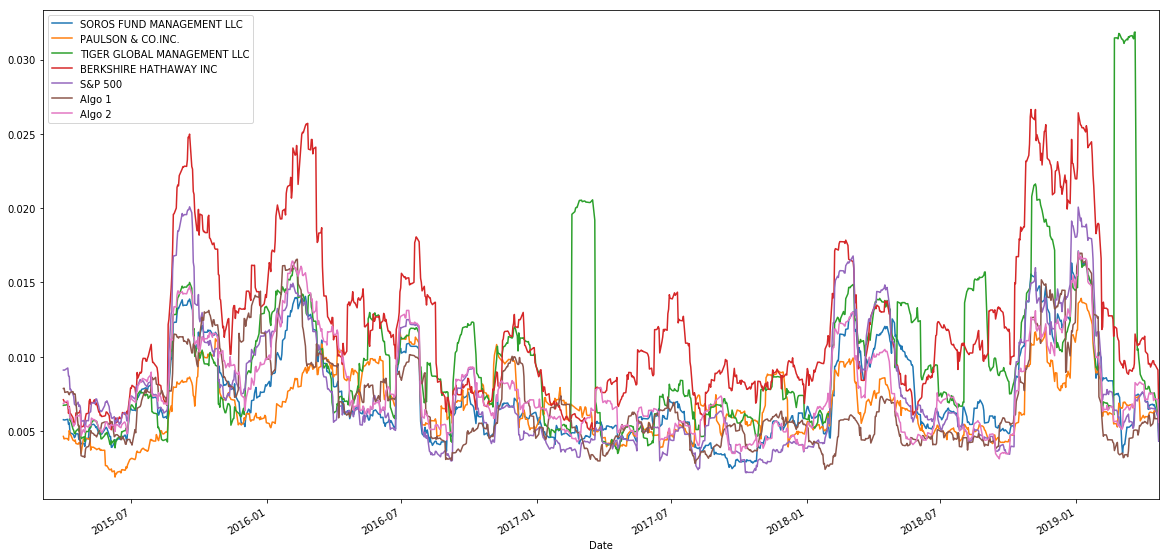

In [174]:
# Calculate and plot the rolling standard deviation for the 
#S&PP 500 using a 21 day window

rolling_std = all_returns.rolling(window=21).std().plot(figsize = (20,10))

rolling_std




In [175]:
# Correlation
# YOUR CODE HERE
corr_returns = all_returns.corr()
corr_returns
#sns.heatmap(corr_returns, vmin=-1, vmax =1, annot = True)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,Algo 1,Algo 2
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.837864,0.321211,0.826873
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.669732,0.268840,0.678152
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.623946,0.164387,0.507414
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.751371,0.292033,0.688082
S&P 500,0.837864,0.669732,0.623946,0.751371,1.000000,0.279494,0.858764
Algo 1,0.321211,0.268840,0.164387,0.292033,0.279494,1.000000,0.288243
Algo 2,0.826873,0.678152,0.507414,0.688082,0.858764,0.288243,1.000000


In [176]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# YOUR CODE HERE


berky_cov = all_returns['BERKSHIRE HATHAWAY INC'].cov(all_returns['S&P 500'])
berky_cov

8.302834941861689e-05

In [177]:
variance = all_returns['S&P 500'].var()
variance

7.316632424648712e-05

In [178]:
berk_beta = berky_cov / variance
berk_beta


1.1347891297491723

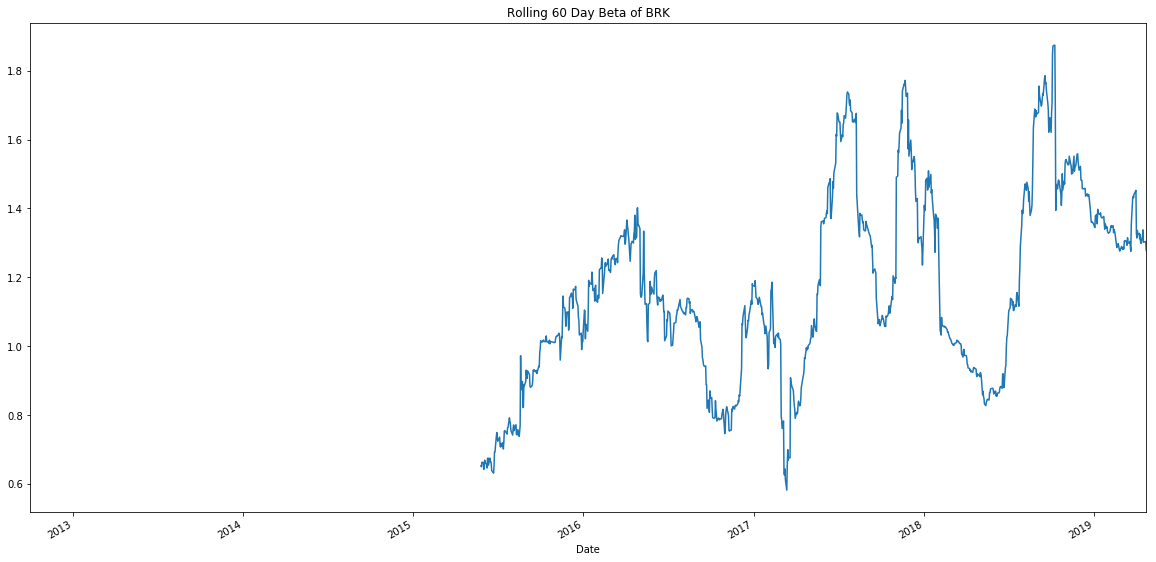

In [179]:
###ROlling 60 day Beta
roll_cov = all_returns['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(all_returns['S&P 500'])

roll_var = spy_df['S&P 500'].rolling(window=60).var()

roll_beta = roll_cov / roll_var

roll_beta.plot(figsize = (20,10),title = 'Rolling 60 Day Beta of BRK')

In [180]:
###EMA 21-day half life
# (OPTIONAL) YOUR CODE HERE
ewm = all_returns.ewm(halflife=21)
#ewm.plot()
#rolling = annual_returns.sort_index(ascending=True).rolling(window=XXX).mean()

In [181]:
####SHARPE####
Rp = (all_returns.mean() * 252)



In [214]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE
 

sharpe =   Rp / ann_std

sharpe

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
S&P 500                        0.648267
Algo 1                         1.378648
Algo 2                         0.501364
dtype: float64

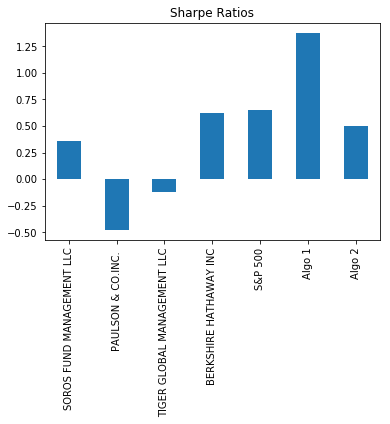

In [215]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE


sharpe.plot(kind = 'bar', title = 'Sharpe Ratios')

In [184]:
###PORTFOLIO RETURNS####

In [185]:
#Apple

apple_csv_path = Path('/Users/brent/RU-HOU-FIN-PT-07-2019-U-C/hw/03-Python_and_Pandas/Instructions/Resources/aapl_historical.csv')

apple_df = pd.read_csv(apple_csv_path, index_col = "Trade DATE", infer_datetime_format = True, parse_dates = True )

apple_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [186]:
#Google

goog_csv_path = Path('/Users/brent/RU-HOU-FIN-PT-07-2019-U-C/hw/03-Python_and_Pandas/Instructions/Resources/goog_historical.csv')

google_df = pd.read_csv(goog_csv_path, index_col = "Trade DATE")

google_df.head()


,Symbol,NOCP
Trade DATE,,
5/9/2019,GOOG,1162.38
5/8/2019,GOOG,1166.27
5/7/2019,GOOG,1174.10
5/6/2019,GOOG,1189.39
5/3/2019,GOOG,1185.40


In [187]:
#Costco

cost_csv_path = Path('/Users/brent/RU-HOU-FIN-PT-07-2019-U-C/hw/03-Python_and_Pandas/Instructions/Resources/cost_historical.csv')

cost_df = pd.read_csv(cost_csv_path, index_col = "Trade DATE", infer_datetime_format = True, parse_dates = True )

cost_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [188]:
#### Concat Stocks DF


custom_stocks = pd.concat([apple_df, google_df, cost_df], axis = 1, join = "inner")


custom_stocks.tail()

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2018-05-17,AAPL,186.99,GOOG,1078.59,COST,199.60
2018-05-16,AAPL,188.18,GOOG,1081.77,COST,198.71
2018-05-15,AAPL,186.44,GOOG,1079.23,COST,195.48
2018-05-14,AAPL,188.15,GOOG,1100.20,COST,195.88
2018-05-11,AAPL,188.59,GOOG,1098.26,COST,195.76


In [189]:
### RESET INDEX
custom_stocks.reset_index(inplace=True)


In [190]:
# Pivot the Data so that the stock tickers are the columns,
#the dates are the index, and the 
# # values are the closing prices
# custom_stocks.rename(columns={'NOCP': 'Symbol'},inplace=True)
# custom_stocks
pivot_main = pd.pivot_table(custom_stocks, index = ['Trade DATE'], values = ['NOCP'])
#pivot_main.rename(columns={'NOCP': 'Symbol'},inplace=True)
#custom_stocks

#custom_stocks.rename(columns= {'NOCP': 'AAPL','NOCP': 'GOOG', 'NOCP': 'COST'})
pivot_main.columns = ['AAPL', 'GOOG', 'COST']
pivot_main.tail()

,AAPL,GOOG,COST
Trade DATE,,,
2019-05-03,211.75,1185.40,244.62
2019-05-06,208.48,1189.39,244.23
2019-05-07,202.86,1174.10,240.18
2019-05-08,202.90,1166.27,241.34
2019-05-09,200.72,1162.38,243.47


In [191]:
df_new = pivot_main.reset_index()
df_new.index = df_new['Trade DATE']

df_new.drop(['Trade DATE'],axis =1, inplace=True)
df_new.head()

,AAPL,GOOG,COST
Trade DATE,,,
2018-05-11,188.59,1098.26,195.76
2018-05-14,188.15,1100.20,195.88
2018-05-15,186.44,1079.23,195.48
2018-05-16,188.18,1081.77,198.71
2018-05-17,186.99,1078.59,199.60


In [192]:
# Drop Nulls
# YOUR CODE HERE

df_new = df_new.pct_change()
df_new.dropna(inplace=True)
df_new.head()

,AAPL,GOOG,COST
Trade DATE,,,
2018-05-14,-0.002333,0.001766,0.000613
2018-05-15,-0.009088,-0.019060,-0.002042
2018-05-16,0.009333,0.002354,0.016523
2018-05-17,-0.006324,-0.002940,0.004479
2018-05-18,-0.003637,-0.011339,-0.003206


In [193]:
####### CALCULATE THE WTD. RETURNS FOR THE PORTFOLIO IF # 
###### OF SHARES IS EQUAL 

In [194]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
portfolio_returns = df_new.dot(weights)
portfolio_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

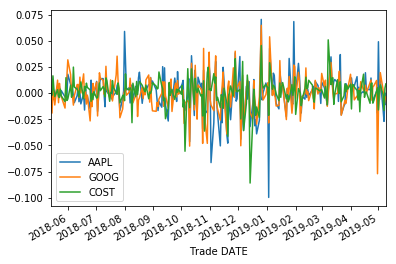

In [195]:
###### JOIN THE PORTFOLIO RETURNS TO THE DATAFRAME THAT
###### CONTAINS ALL OF THE PORTFOLIO RETURNS
#all_returns.plot()
df_new.plot()

In [196]:
#joindfs

joined_df= pd.concat([all_returns,portfolio_returns], axis =1, join= "inner")
joined_df.rename(columns={0: 'Custom'},inplace=True)
joined_df.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,Algo 1,Algo 2,Custom
2019-04-16,0.002699,0.000388,-0.000831,0.000837,0.000509,-0.006945,0.002899,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.002274,-0.010301,-0.005228,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,0.001579,-0.000588,-0.001229,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.001012,0.000677,-0.001936,0.001217
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.008841,0.004969,0.009622,0.011959


In [197]:
# Only compare dates where the new, custom portfolio has dates
# YOUR CODE HERE
joined_df.isnull().sum()
mod_df =joined_df.drop(joined_df.index[0],inplace=True)

In [198]:
joined_df.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,Algo 1,Algo 2,Custom
2019-04-16,0.002699,0.000388,-0.000831,0.000837,0.000509,-0.006945,0.002899,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.002274,-0.010301,-0.005228,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,0.001579,-0.000588,-0.001229,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.001012,0.000677,-0.001936,0.001217
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.008841,0.004969,0.009622,0.011959


In [199]:
#Risk 
risk = joined_df.std()
risk
party = risk * np.sqrt(252)
party

SOROS FUND MANAGEMENT LLC      0.146987
PAULSON & CO.INC.              0.116980
TIGER GLOBAL MANAGEMENT LLC    0.233023
BERKSHIRE HATHAWAY INC         0.247680
S&P 500                        0.152376
Algo 1                         0.133988
Algo 2                         0.139843
Custom                         0.211944
dtype: float64

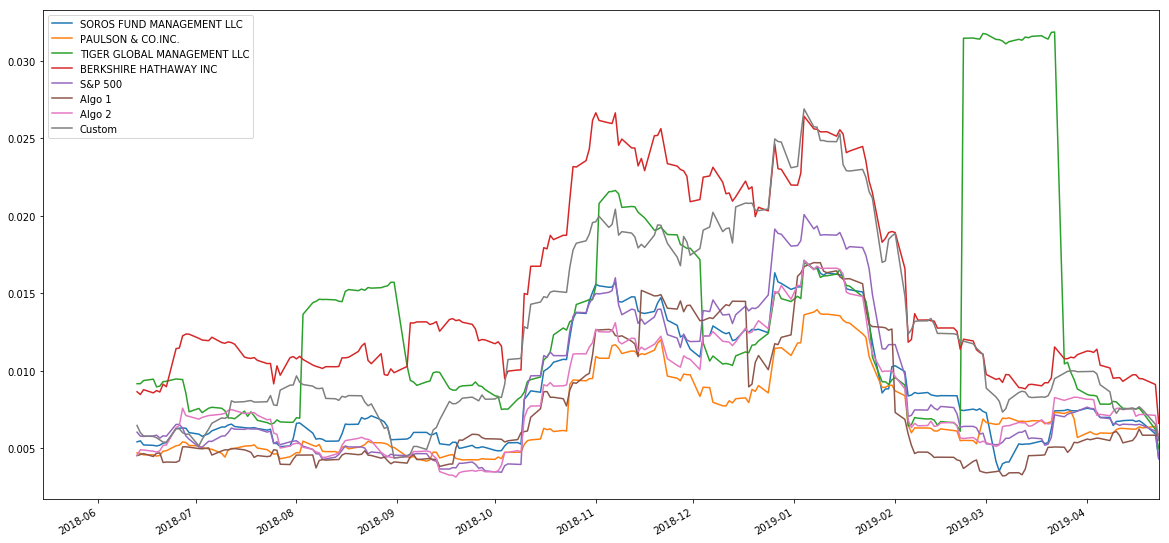

In [200]:
#rolling plot

joined_df.rolling(window=21).std().plot(figsize =(20,10) )

In [201]:
# dada = df_new.pct_change()
# dada.dropna(inplace=True)

In [202]:
# df_new.head()

In [203]:
#beta custom

new_cov = joined_df['Custom'].cov(joined_df['S&P 500'])
new_cov

0.00011173860577794616

In [204]:
## variance
variance = joined_df['S&P 500'].var()
variance

9.21368015830909e-05

In [205]:
## beta 
betaboy = new_cov/ variance
betaboy

1.2127467402607626

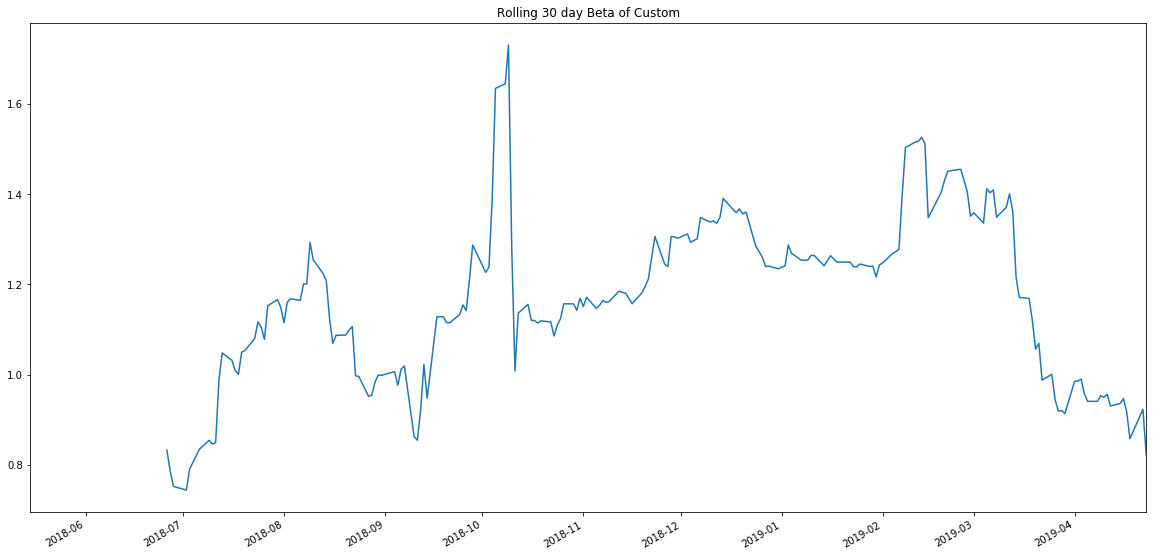

In [206]:
#betaplot



###ROlling 60 day Beta
roll_cov_end = joined_df['Custom'].rolling(window=30).cov(joined_df['S&P 500'])

roll_var_end = joined_df['S&P 500'].rolling(window=30).var()

roll_beta_end = roll_cov_end / roll_var_end

roll_beta_end.plot(figsize = (20,10),title = 'Rolling 30 day Beta of Custom')

In [217]:
#annualized sharpe

sharpe_2

SOROS FUND MANAGEMENT LLC      0.431622
PAULSON & CO.INC.              0.259283
TIGER GLOBAL MANAGEMENT LLC   -1.036405
BERKSHIRE HATHAWAY INC         0.160092
S&P 500                        0.579865
Algo 1                         2.032666
Algo 2                         0.068300
Custom                         0.935018
dtype: float64

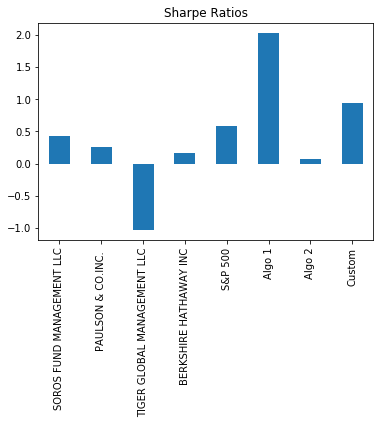

In [216]:
#annualizedsharpe
Rp_3 = (joined_df.mean() * 252)

risk_2 = joined_df.std()

ann_std_3 = risk_2 * np.sqrt(252)
# ann_std

sharpe_2 =   Rp_3 /ann_std_3

# sharpe

sharpe_2.plot(kind = 'bar', title = 'Sharpe Ratios')

In [218]:
#Correlations 
#with custom
joined_df.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,Algo 1,Algo 2,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.791962,0.478640,0.816675,0.876995,0.337824,0.862928,0.733250
PAULSON & CO.INC.,0.791962,1.000000,0.485385,0.650757,0.766690,0.361301,0.783724,0.644211
TIGER GLOBAL MANAGEMENT LLC,0.478640,0.485385,1.000000,0.325462,0.481022,0.114560,0.409478,0.391994
BERKSHIRE HATHAWAY INC,0.816675,0.650757,0.325462,1.000000,0.852312,0.327000,0.782866,0.801161
S&P 500,0.876995,0.766690,0.481022,0.852312,1.000000,0.289365,0.875745,0.871900
Algo 1,0.337824,0.361301,0.114560,0.327000,0.289365,1.000000,0.365552,0.261468
Algo 2,0.862928,0.783724,0.409478,0.782866,0.875745,0.365552,1.000000,0.740037
Custom,0.733250,0.644211,0.391994,0.801161,0.871900,0.261468,0.740037,1.000000
